
This project aims to find correlation between patients(females) that have Diabetes or not , with results of their other medical analyses.

What is Diabetes?
Diabetes is a condition in which the body cannot use the sugars and starches (carbohydrates) it takes in as food to make energy. The body either makes no insulin or too little insulin or cannot use the insulin it makes to change those sugars and starches into energy. As a result, extra sugar builds up in the blood.

Pregnancies
Normally, various hormones work to keep your blood sugar levels in check. But during pregnancy, hormone levels change, making it harder for your body to process blood sugar efficiently. This makes your blood sugar rise.

Glucose
Diabetes is a problem with your body that causes blood sugar (also called blood glucose) levels to rise higher than normal. This is also called hyperglycemia.


Blood Pressure
Blood pressure is the pressure your heart uses to push blood through your blood vessels and around your body.
There are two numbers used to describe blood pressure and it’s measured in millimetres of mercury (mmHg). It’s written like this: 130/80mmHg. And you’ll hear your doctor say '130 over 80'.


Skin Thickness
In fact, skin problems are sometimes the first sign that a person has diabetes. The average Skin Thicknes for patience who has diabetes is approximately 29.15. 

Insulin
Insulin helps control blood glucose levels by signaling the liver and muscle and fat cells to take in glucose from the blood. Insulin therefore helps cells to take in glucose to be used for energy.

BMI
BMI (Body Mass Index) is a number calculated by dividing a person's weight in kilograms by his or her height in meters squared. BMI is a useful tool used in determining the degree of an individual's excess weight.

Being overweight (BMI of 25-29.9), or affected by obesity (BMI of 30-39.9) or morbid obesity (BMI of 40 or greater), greatly increases your risk of developing type 2 diabetes. 

Diabetes pedigree function its a function which scores likelihood of diabetes based on family history.

Age
Age is a big risk factor for type 2. The older you are, the more likely you are to have it. 

keys:

Pregnancies:    Number of times pregnant\
Glucose:    Plasma glucose concentration a 2 hours in an oral glucose tolerance test\
BloodPressure:    Diastolic blood pressure (mm Hg)\
SkinThickness:    Triceps skin fold thickness (mm)  --- is greater in insulin-dependent diabetes\
Insulin:    2-Hour serum insulin (mu U/ml)----- normal level after two hours is : 16-166 (mu U/ml) \
BMI:    Body mass index (weight in kg/(height in m)^2)\
DiabetesPedigreeFunction: ----- A function that scores the likelihood of diabetes based on family history\
Age:    Age (years)\
Outcome:    Has diabetes or not, (0 or 1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install dexplot

     |████████████████████████████████| 173 kB 13.4 MB/s 


In [3]:
import dexplot as dxp
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import random
from skimage import io
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy
from scipy import stats
from pylab import rcParams
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot as plt
%matplotlib inline
#import missingno as msno
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# from tpot import TPOTClassifier
#df = pd.read_csv("/content/drive/MyDrive/naya_shaker im/dia/diabetes.csv")


In [4]:
df = pd.read_csv("/content/drive/MyDrive/naya_shaker im/dia/diabetes.csv")

In [ ]:
#open the csv file IMRI
df = pd.read_csv("/content/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df2 = df.copy()
df2.Outcome = df2.Outcome.apply(lambda x:'Healthy' if x == 0 else 'Sick')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick


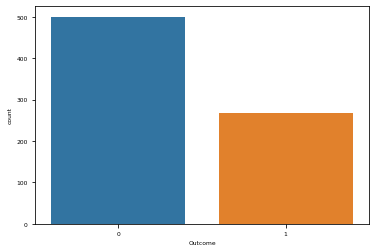

In [49]:
sns.countplot("Outcome", data = df);

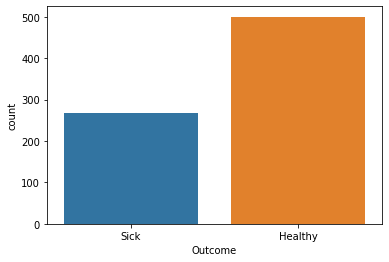

In [11]:
sns.countplot("Outcome", data = df2);

In [12]:
sum_1 = 0 
sum_0 = 0
for i in df2['Outcome']:
    if i == 'Sick':
        sum_1 += 1
    else:
        sum_0 += 1
print("{} dont have diabetes".format(sum_0), "\n{} have diabetes".format(sum_1))

500 dont have diabetes 
268 have diabetes


In [13]:
df2.describe() # statistic information

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


We can easy see that there are some illogical observations, such as BMI = 0.0, Insulin = 0.0,...etc. So, now we have to clear our dataset from these observations. The best way, so as not to lose enough information is to replace zeros with the mean of their correspoding column.
'Insulin' have very high standard deviation which means data is distributed in a larger range.\
we can replace the zero values with the mean of their feutures, but because We have enough observations and according to the data and the missing values we see it more correct to drop them out

In [14]:
# df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
# df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
# df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
# df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
# df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
# df = df.copy()

In [15]:
df2 = df2.drop(df2[df2.Glucose==0].index)
df2 = df2.drop(df2[df2.BloodPressure==0].index)
df2 = df2.drop(df2[df2.SkinThickness==0].index)
df2 = df2.drop(df2[df2.Insulin==0].index)
df2 = df2.drop(df2[df2.BMI==0].index)
df2.describe()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


In [16]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


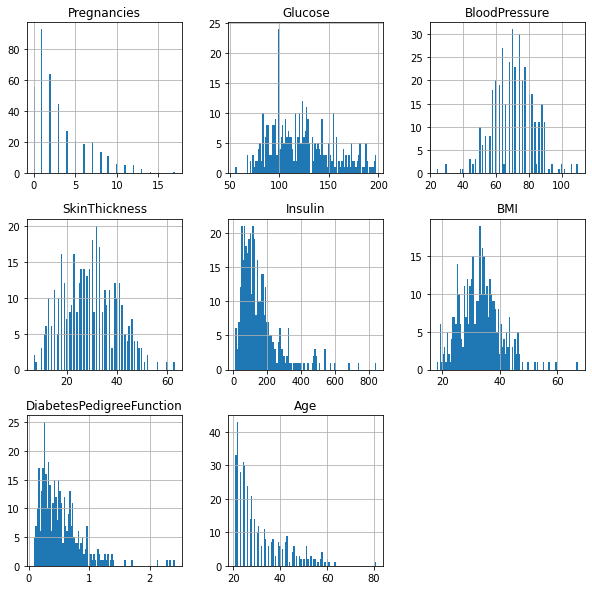

In [17]:
df2.hist(bins = 100, figsize = (10,10));

we'll remove the outliars

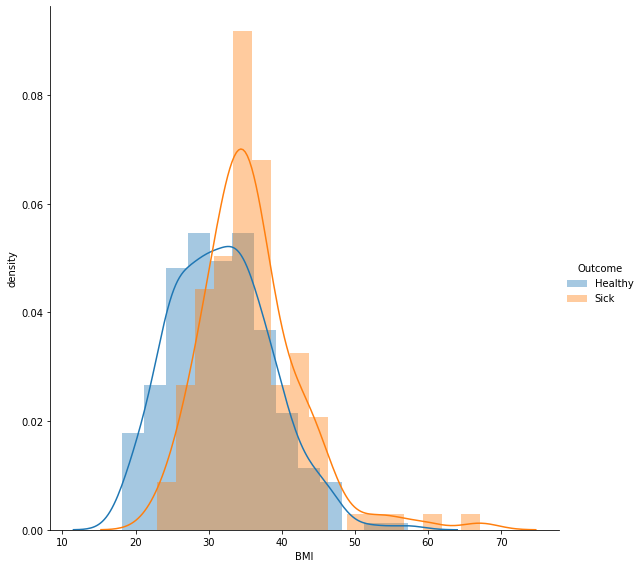

In [18]:
sns.FacetGrid (df2,hue='Outcome',height=8).map(sns.distplot,'BMI').set_axis_labels('BMI',
'density').add_legend()
plt.show();

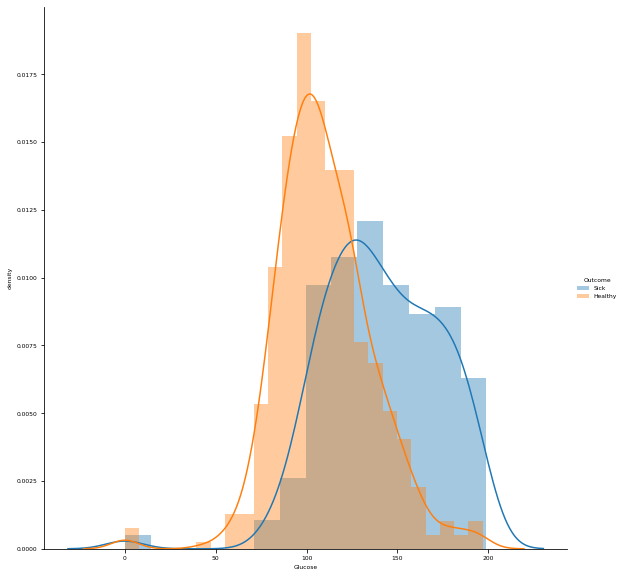

In [95]:
sns.FacetGrid (df2,hue='Outcome',height=8).map(sns.distplot,'Glucose').set_axis_labels('Glucose',
'density').add_legend()
plt.show();

T TESTS

In [64]:
from scipy.stats import ttest_ind
ttest_ind(df.BMI, df.SkinThickness)

Ttest_indResult(statistic=17.841851120015438, pvalue=7.5473656370205946e-65)

In [65]:
from scipy.stats import ttest_ind
ttest_ind(df.Age, df.Glucose)

Ttest_indResult(statistic=-71.30474190672682, pvalue=0.0)

In [66]:
from scipy.stats import ttest_ind
ttest_ind(df.DiabetesPedigreeFunction, df.Pregnancies)

Ttest_indResult(statistic=-27.60925074681145, pvalue=1.4831587376364908e-136)

In [67]:
from scipy.stats import ttest_ind
ttest_ind(df.Insulin, df.Outcome)

Ttest_indResult(statistic=19.10536356991872, pvalue=3.653183652705382e-73)

In [68]:
from scipy.stats import ttest_ind
ttest_ind(df.Glucose, df.BMI)

Ttest_indResult(statistic=74.81617416733874, pvalue=0.0)

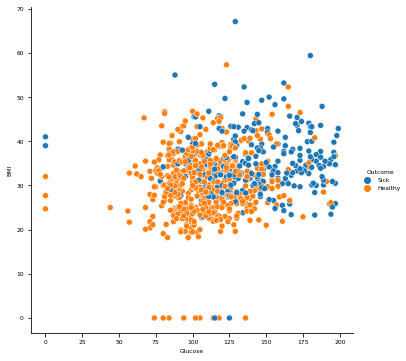

In [69]:
sns.relplot(x = "Glucose", y = "BMI", hue = "Outcome", data = df2);

From the above scatter plot we can understant that the higher the Glucose the more possible is to be diabetic, regardless the bloodPressure levels.

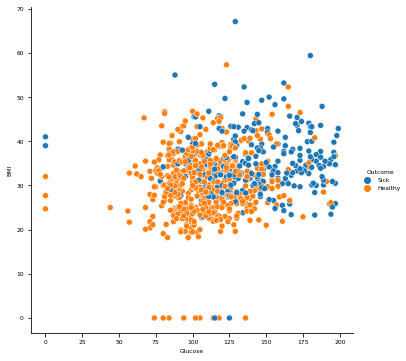

In [70]:
sns.relplot(x = "Glucose", y = "BMI", hue = "Outcome", data = df2);

As the Glocuse and BMI getting higher, it is more possible to be diabetic

> Indented block



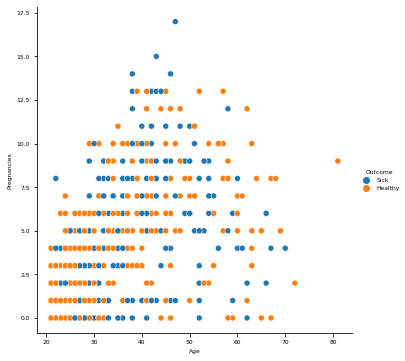

In [71]:
sns.relplot(x = "Age", y = "Pregnancies", hue = "Outcome", data = df2);

As the number of pragnancies and BMI getting higher, it is more possible to be diabetic

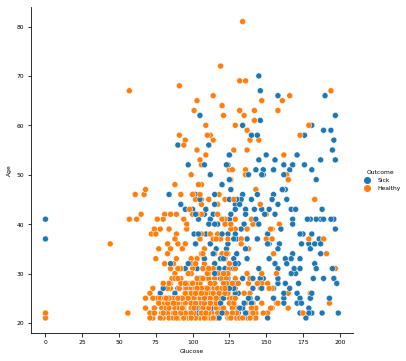

In [72]:
sns.relplot(y = "Age", x = "Glucose", hue = "Outcome", data = df2);

from the scatterplot we can clearly see that diabetic patients have high glucose and low insulin

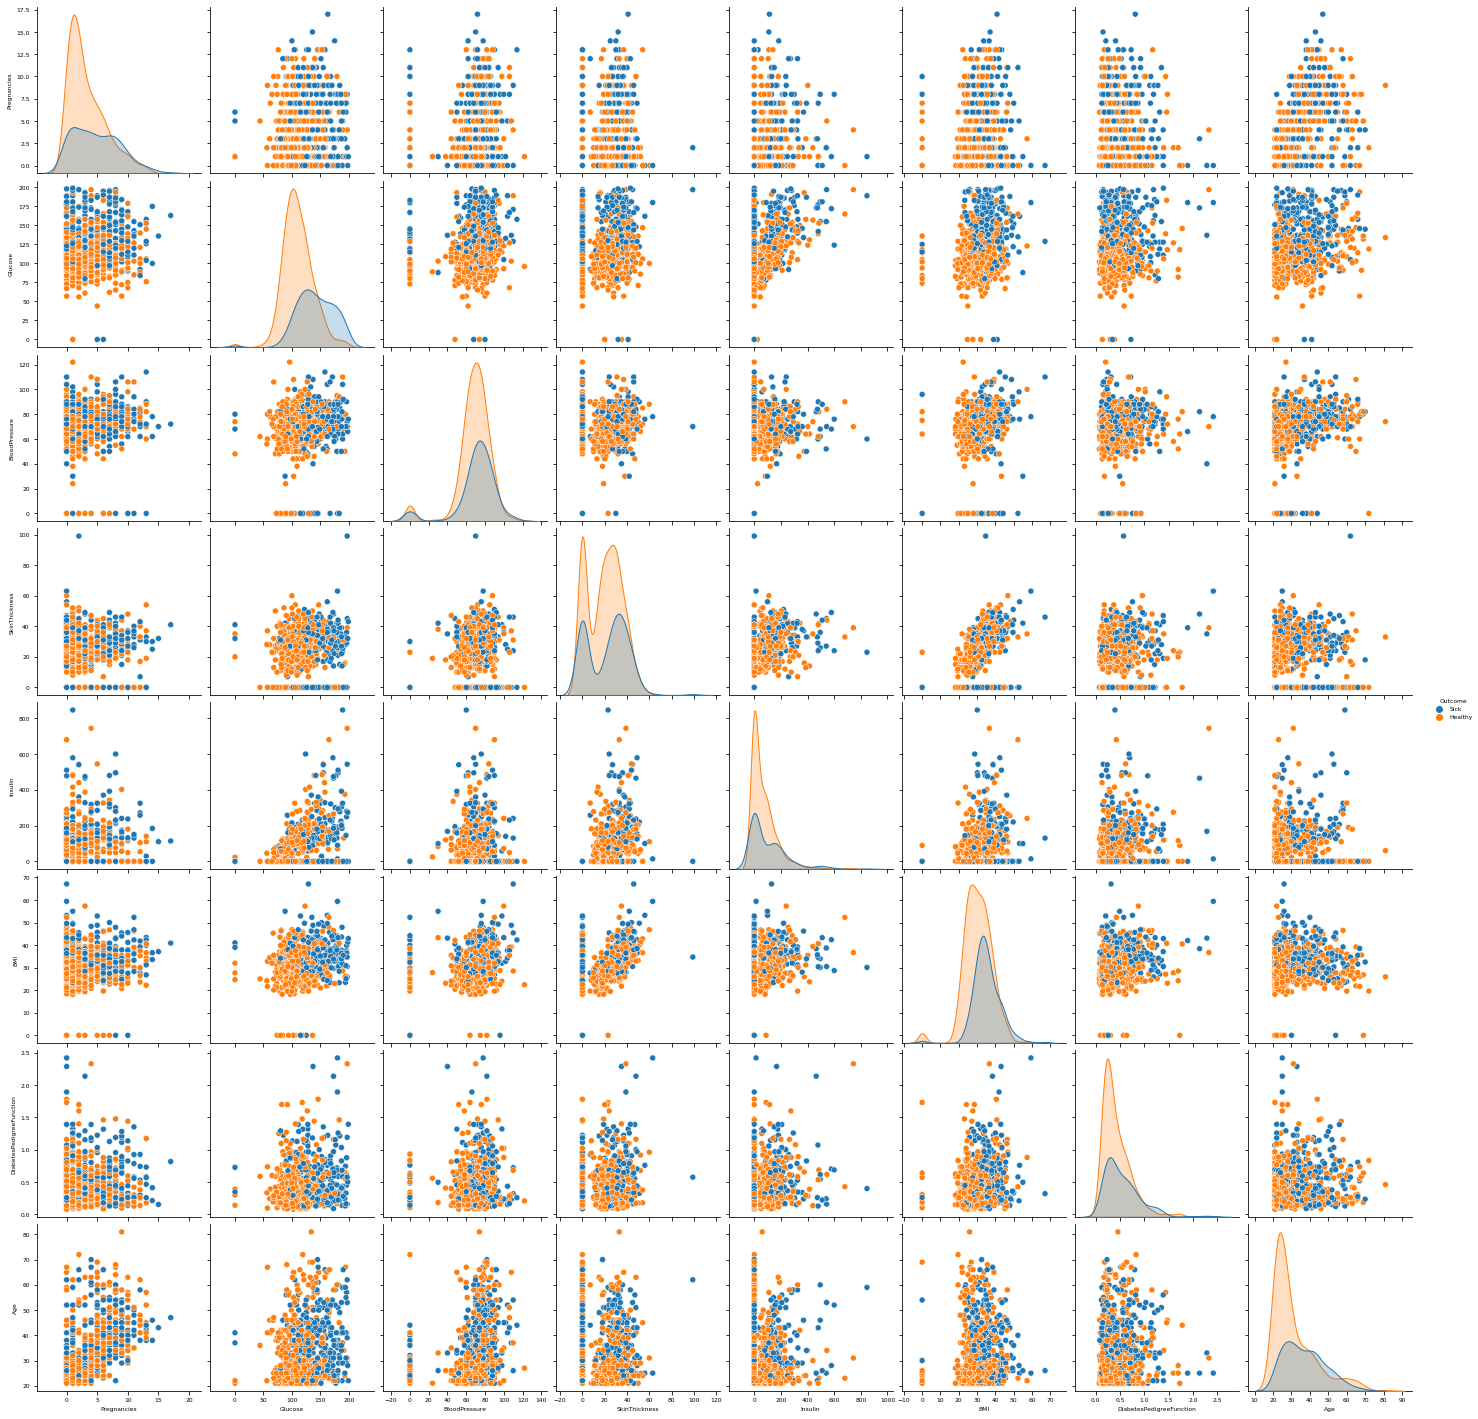

In [73]:
p = sns.pairplot(df2,hue = 'Outcome')

In [74]:
fig = make_subplots(cols=4, rows=2, subplot_titles=(df2.columns))

fig.add_trace(go.Box(x=df.Pregnancies), row=1, col=1)
fig.add_trace(go.Box(x=df.Glucose), row=1, col=2)
fig.add_trace(go.Box(x=df.BloodPressure), row=1, col=3)
fig.add_trace(go.Box(x=df.SkinThickness), row=1, col=4)

fig.add_trace(go.Box(x=df.Insulin), row=2, col=1)
fig.add_trace(go.Box(x=df.BMI), row=2, col=2)
fig.add_trace(go.Box(x=df.DiabetesPedigreeFunction), row=2, col=3)
fig.add_trace(go.Box(x=df.Age), row=2, col=4)

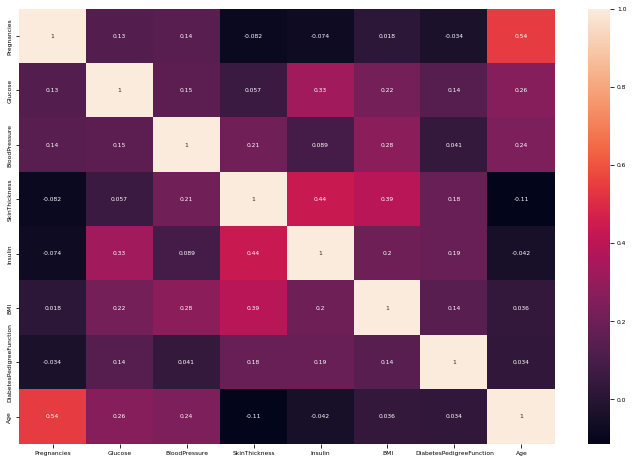

In [75]:
corr_matrix = df2.corr()
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix,annot = True);

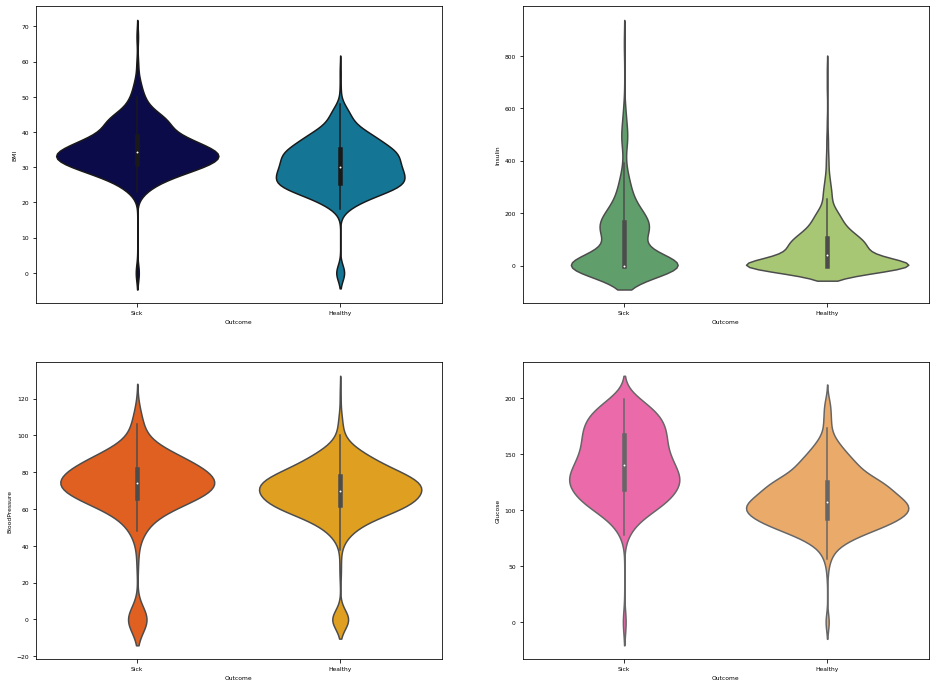

In [76]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.violinplot(x='Outcome', y='BMI', data=df2, palette='ocean')

plt.subplot(2,2,2)
sns.violinplot(x='Outcome', y='Insulin', data=df2, palette='summer')

plt.subplot(2,2,3)
sns.violinplot(x='Outcome', y='BloodPressure', data=df2, palette='autumn')

plt.subplot(2,2,4)
sns.violinplot(x='Outcome', y='Glucose', data=df2, palette='spring');

In [77]:
df2 = df.copy()
df2.Outcome = df2.Outcome.apply(lambda x:'Healthy' if x == 0 else 'Sick')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick


In [78]:
NewBMI = pd.Series(["1-Underweight", "2-Normal", "3-Overweight", "4-Obesity 1", "5-Obesity 2", "6-Obesity 3"], dtype = "category")

df2["NewBMI"] = NewBMI

df2.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df2.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df2.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df2.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df2.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df2.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,0,33.6,0.627,50,Sick,4-Obesity 1
1,1,85,66,29,0,26.6,0.351,31,Healthy,3-Overweight
2,8,183,64,0,0,23.3,0.672,32,Sick,2-Normal
3,1,89,66,23,94,28.1,0.167,21,Healthy,3-Overweight
4,0,137,40,35,168,43.1,2.288,33,Sick,6-Obesity 3


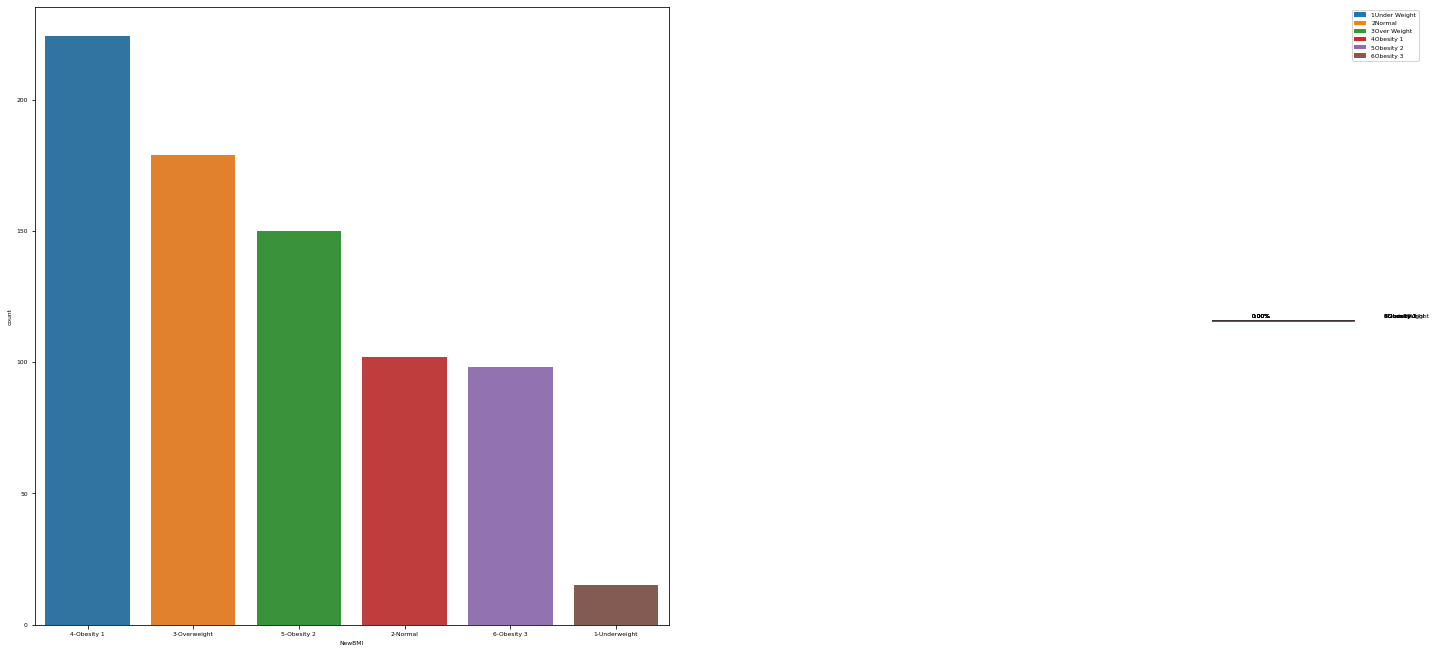

In [79]:
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
order = df2.groupby('NewBMI').count().sort_values(by='Outcome', ascending=False).index
sns.countplot(x='NewBMI', data=df2, order=order)

plt.subplot(2,2,2)
Under_wei = df2.NewBMI[df2.NewBMI == '1Underweight'].count()
normal = df2.NewBMI[df2.NewBMI == '2Normal'].count()
over_weight = df2.NewBMI[df2.NewBMI == '3Overweight'].count()
obesity_1 = df2.NewBMI[df2.NewBMI == '4Obesity 1'].count()
obesity_2 = df2.NewBMI[df2.NewBMI == '5Obesity 2'].count()
obesity_3 = df2.NewBMI[df2.NewBMI == '6Obesity 3'].count()
weights = [Under_wei, normal, over_weight, obesity_1, obesity_2, obesity_3]
labels = ['1Under Weight', '2Normal', '3Over Weight', '4Obesity 1', '5Obesity 2', '6Obesity 3']
plt.pie(weights, labels=labels, autopct="%.2f%%", shadow=True);
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()
plt.show()

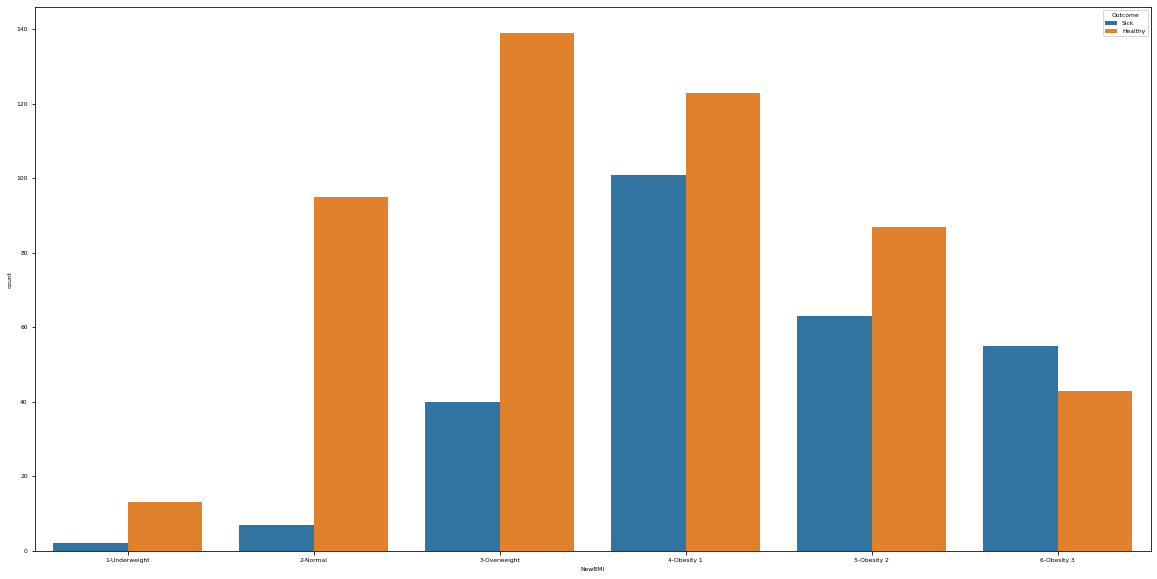

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(x='NewBMI', hue='Outcome', data=df2);

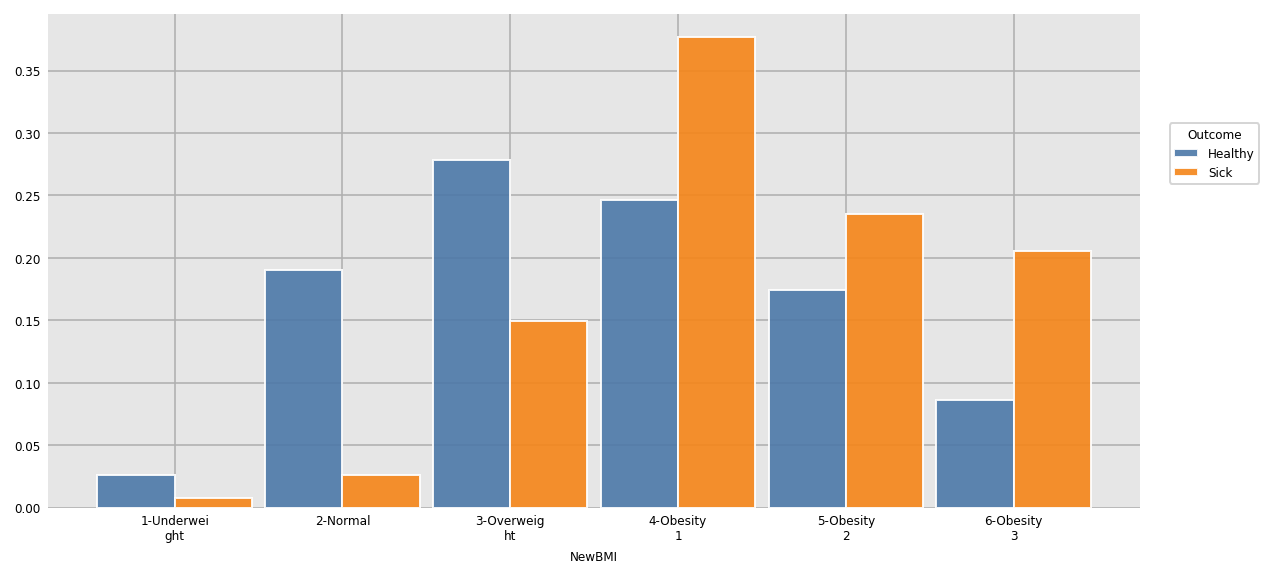

In [81]:
dxp.count('NewBMI', data=df2, split='Outcome', normalize='Outcome', figsize=(8, 4))

we can see that in obesity level 3 , there are more sick women then healthy

In [82]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"   


In [83]:
df2["NewInsulinScore"] = df2.apply(set_insulin, axis=1)

In [84]:
df2.NewInsulinScore.value_counts()

Abnormal    508
Normal      260
Name: NewInsulinScore, dtype: int64

In [85]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,72,35,0,33.6,0.627,50,Sick,4-Obesity 1,Abnormal
1,1,85,66,29,0,26.6,0.351,31,Healthy,3-Overweight,Abnormal
2,8,183,64,0,0,23.3,0.672,32,Sick,2-Normal,Abnormal
3,1,89,66,23,94,28.1,0.167,21,Healthy,3-Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,Sick,6-Obesity 3,Abnormal


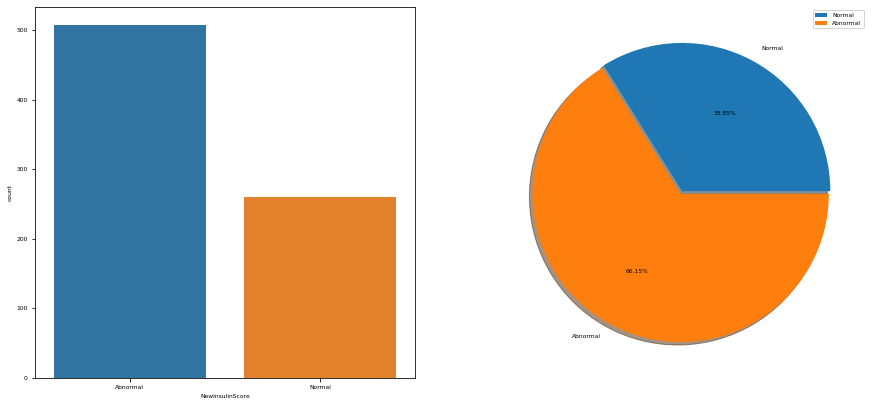

In [86]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='NewInsulinScore', data=df2);

plt.subplot(2,2,2)
normal = df2.NewInsulinScore[df2.NewInsulinScore == 'Normal'].count()
abnormal = df2.NewInsulinScore[df2.NewInsulinScore == 'Abnormal'].count()
plt.pie([normal, abnormal], labels=['Normal', 'Abnormal'], autopct='%.2f%%', explode = [0.01,0.01], shadow=True)
plt.legend()
plt.show()


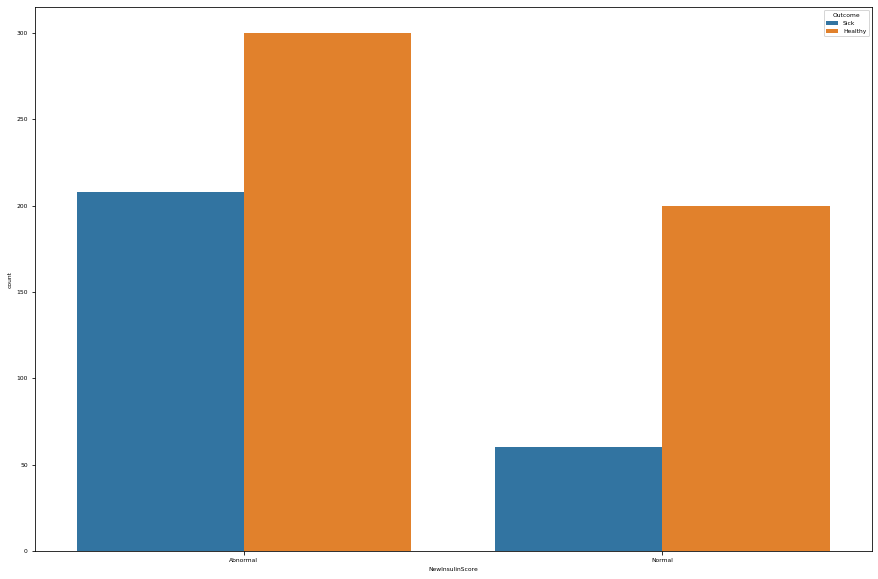

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(x='NewInsulinScore', hue='Outcome', data=df2);

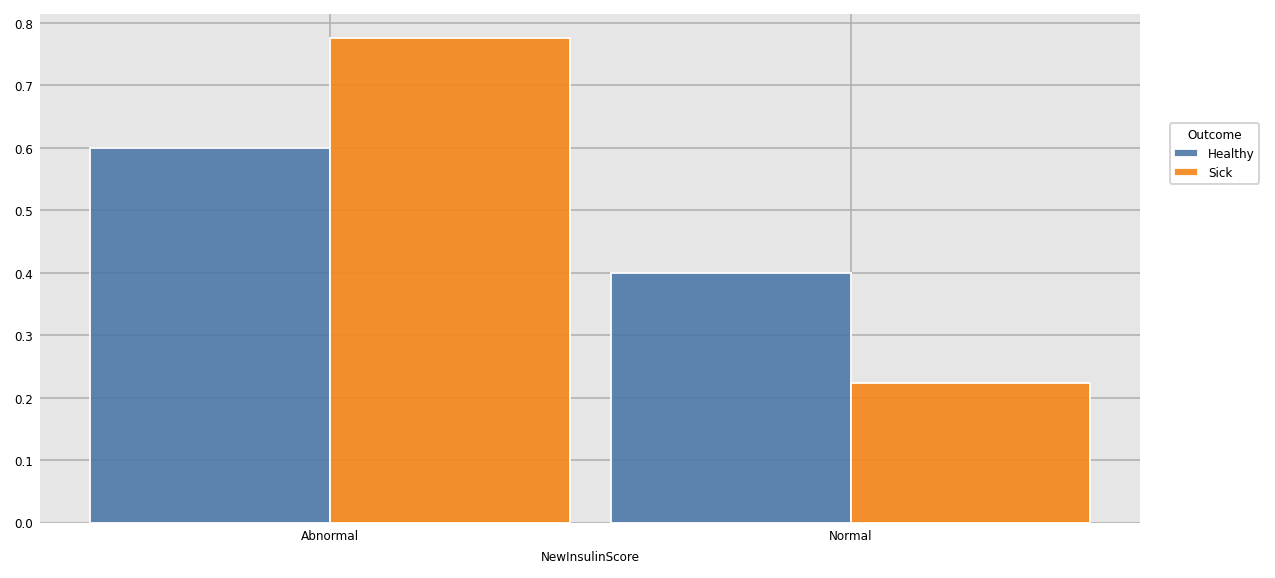

In [88]:
dxp.count('NewInsulinScore', data=df2, split='Outcome', normalize='Outcome', figsize=(8, 4))

מתוך החולים שיעור הלא נורמלי, 

We can see that when the insulin level is abnormal more then 50 percent have diabetes.

In [89]:
NewGlucose = pd.Series(["1-Low", "2-Normal", "3-High", "4-Very high"], dtype = "category")
df2["NewGlucose"] = NewGlucose
df2.loc[df2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df2.loc[(df2["Glucose"] > 70) & (df2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df2.loc[(df2["Glucose"] > 99) & (df2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df2.loc[df2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [90]:
df2.NewGlucose.value_counts()

4-Very high    288
3-High         283
2-Normal       181
1-Low           16
Name: NewGlucose, dtype: int64

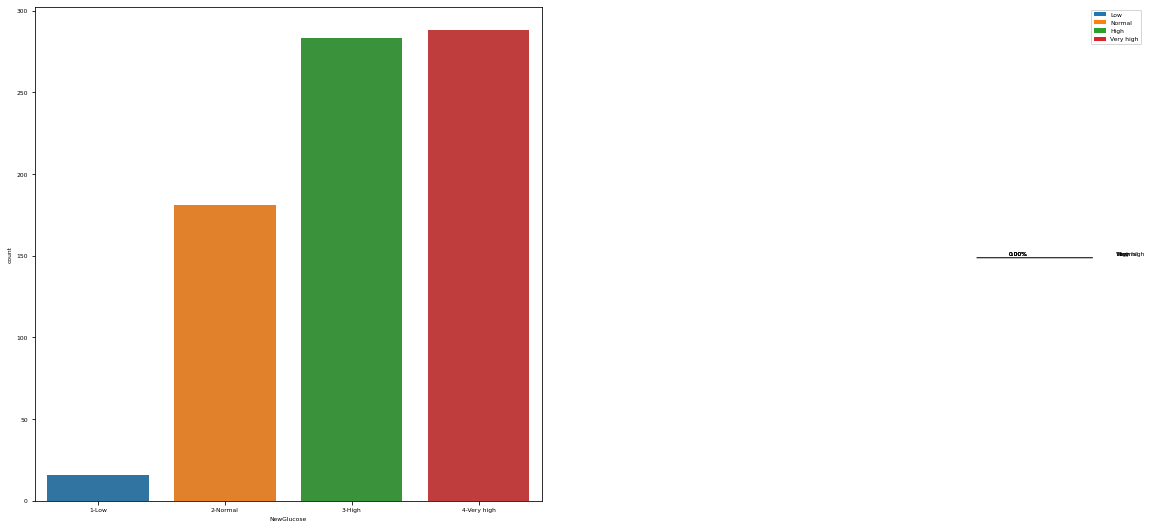

In [91]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='NewGlucose', data=df2);

plt.subplot(2,2,2)
low = df2.NewGlucose[df2.NewGlucose == 'Low'].count()
normal = df2.NewGlucose[df2.NewGlucose == 'Normal'].count()
over_wei = df2.NewGlucose[df2.NewGlucose == 'High'].count()
secret = df2.NewGlucose[df2.NewGlucose == 'Very high'].count()
weight = [low, normal, over_wei, secret]
labels = ['Low', 'Normal', 'High', 'Very high']
plt.pie(weight, labels=labels, autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01,0.01]);
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()
plt.show()

In [92]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,0,33.6,0.627,50,Sick,4-Obesity 1,Abnormal,4-Very high
1,1,85,66,29,0,26.6,0.351,31,Healthy,3-Overweight,Abnormal,2-Normal
2,8,183,64,0,0,23.3,0.672,32,Sick,2-Normal,Abnormal,4-Very high
3,1,89,66,23,94,28.1,0.167,21,Healthy,3-Overweight,Normal,2-Normal
4,0,137,40,35,168,43.1,2.288,33,Sick,6-Obesity 3,Abnormal,4-Very high


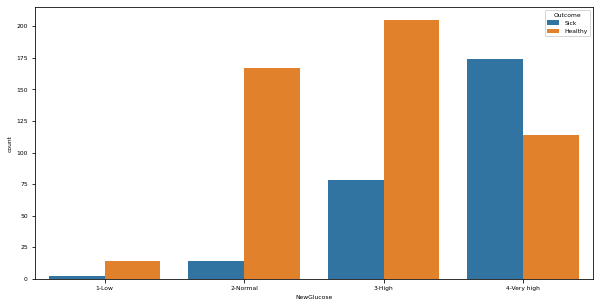

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='NewGlucose', hue='Outcome', data=df2)

we can see that women who have very high level of glucose, are more likely suffering from diabetes

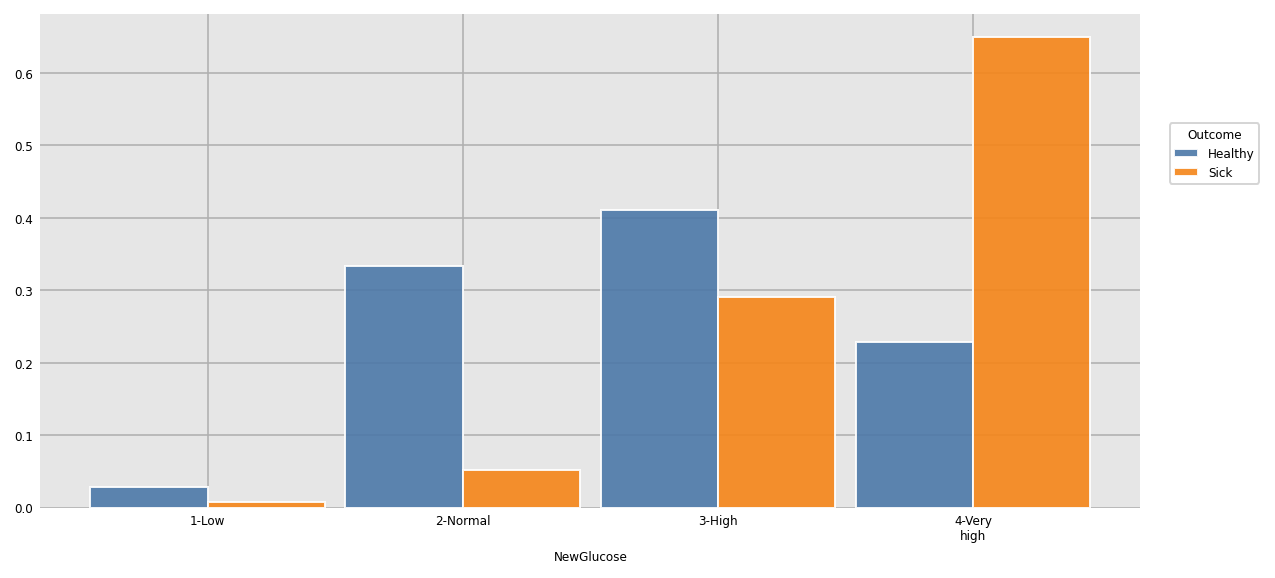

In [94]:
dxp.count('NewGlucose', data=df2, split='Outcome', normalize='Outcome', figsize=(8, 4))